# Bike Sharing Demand Prediction: Amit Pataskar

## Step 1: Load and Explore the Data

In [1]:

import pandas as pd

# Load the dataset
df = pd.read_csv('day.csv')

# Display the first few rows
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.shape

(730, 16)

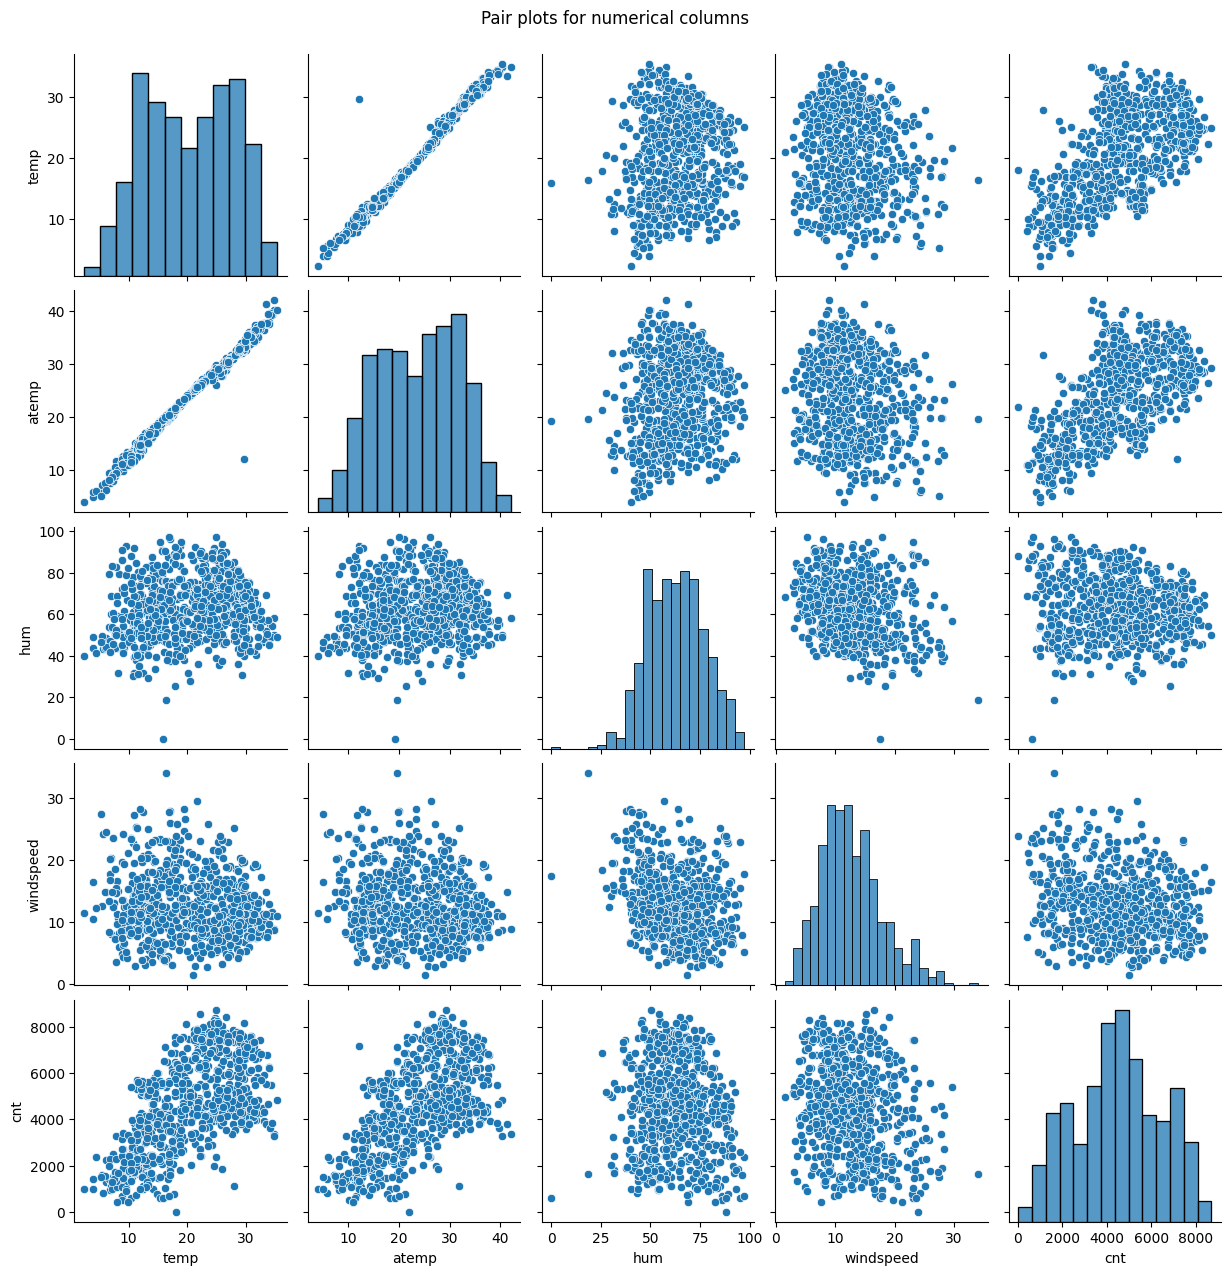

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt 

#pair plots for numerical columns to visualize relations between variables

numerical_columns = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(df[numerical_columns])
plt.suptitle("Pair plots for numerical columns", y=1.02)
plt.show()

In [6]:
# Convert 'dteday' to datetime format
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

# Convert relevant columns to 'category' dtype
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df[categorical_columns] = df[categorical_columns].astype('category')

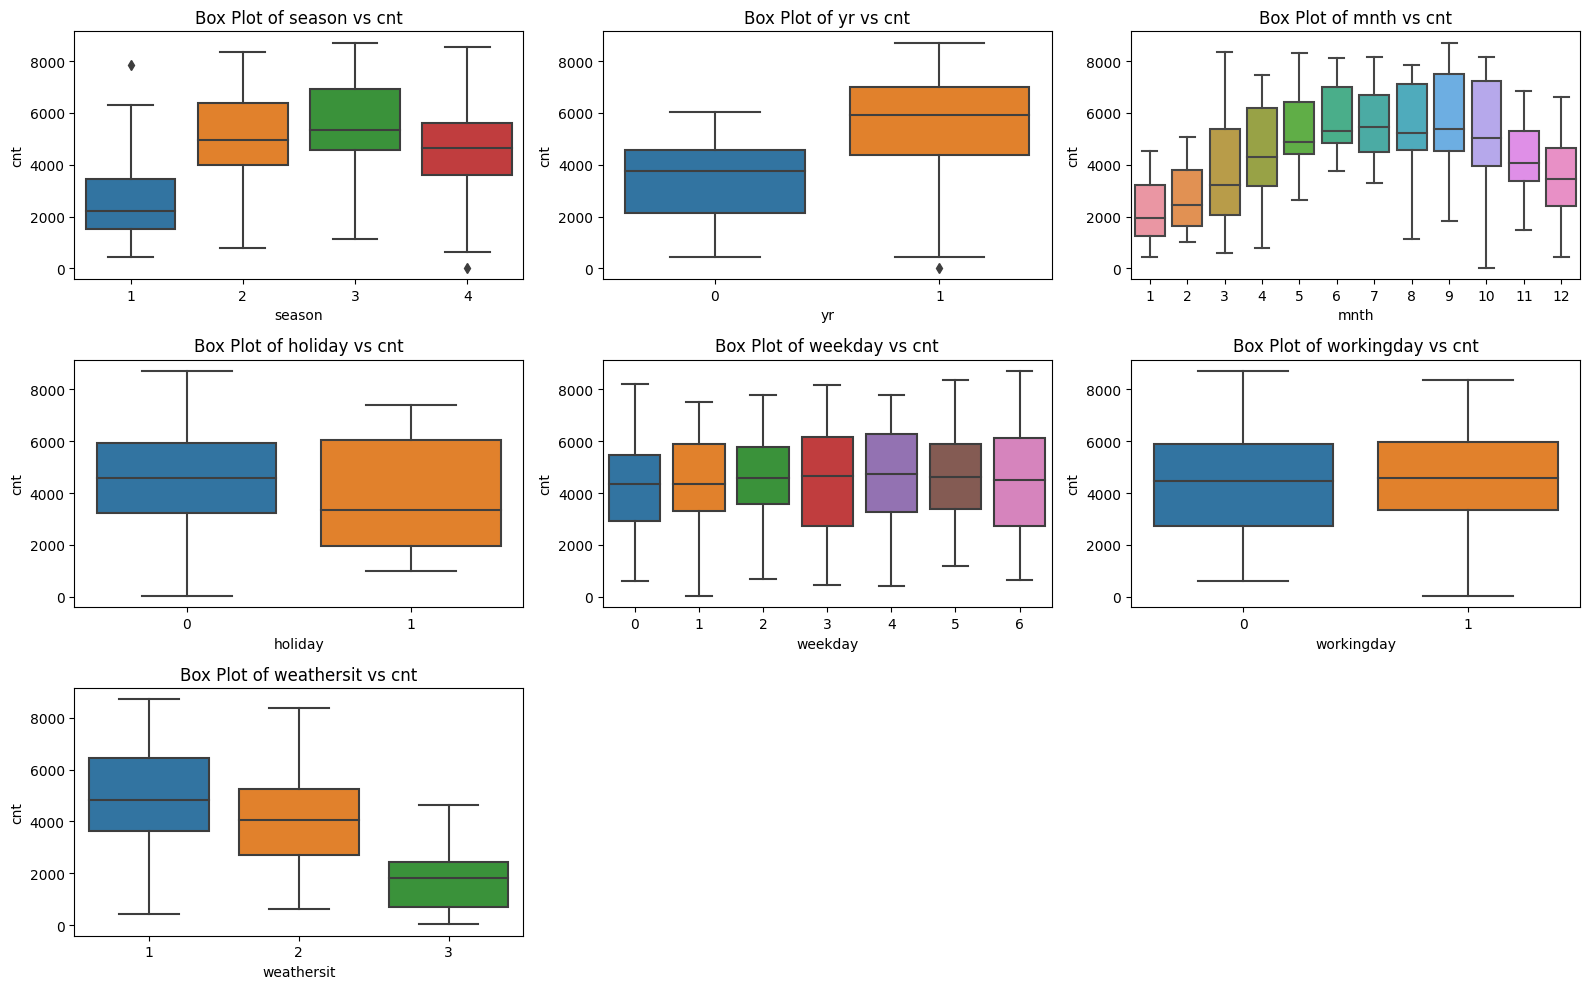

In [7]:
#box plots for categorical columns to visualize relations with target variable
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=col, y='cnt', data=df)
    plt.title(f'Box Plot of {col} vs cnt')

plt.tight_layout()
plt.show()

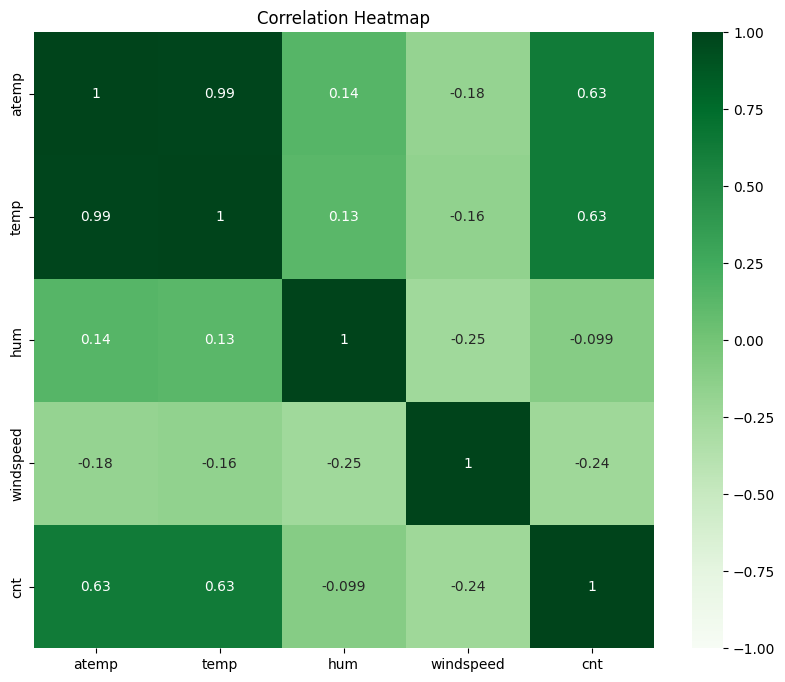

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#correlation analysis

correlation_matrix = df[['atemp','temp','hum','windspeed','cnt']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='Greens',vmin=-1,vmax=1)

#display the heatmap
plt.title('Correlation Heatmap')
plt.show()

## Step 2: Data Cleaning and Preparation

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    category      
 3   yr          730 non-null    category      
 4   mnth        730 non-null    category      
 5   holiday     730 non-null    category      
 6   weekday     730 non-null    category      
 7   workingday  730 non-null    category      
 8   weathersit  730 non-null    category      
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: category(7), datetime64

In [10]:

# Drop redundant columns
df = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])

# Map categorical columns to their text labels
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
weathersit_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
yr_mapping = {0: '2018', 1: '2019'}

df['season'] = df['season'].map(season_mapping)
df['weathersit'] = df['weathersit'].map(weathersit_mapping)
df['yr'] = df['yr'].map(yr_mapping)

# Convert 'yr' to binary 0/1
df['yr'] = df['yr'].map({'2018': 0, '2019': 1})

df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Feature Engineering

In [11]:

# Convert categorical columns to dummy variables
df = pd.get_dummies(df, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True)

# Separate features and target variable
X = df.drop(columns=['cnt'])
y = df['cnt']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling using fit_transform for training data and transform for test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((584, 29), (146, 29))

## Step 4: Model Building and Refinement

In [12]:

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Fit the initial model

## add intercept constant
X_train_with_const = sm.add_constant(X_train_scaled)
initial_model = sm.OLS(y_train, X_train_with_const).fit()

# Apply RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X_train_scaled, y_train)

# Selected features based on rfe
selected_features = X_train.columns[rfe.support_]

# Fit the model with selected features
X_train_rfe = sm.add_constant(X_train_scaled[:, rfe.support_])
rfe_model = sm.OLS(y_train, X_train_rfe).fit()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = selected_features
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe, i+1) for i in range(len(selected_features))]
# Extract p-values from the model
vif_data["p-value"] = rfe_model.pvalues[1:].values
vif_data


,Feature,VIF,p-value
0,yr,1.023621,2.621394e-106
1,temp,183.869727,4.894915e-01
2,atemp,179.272642,1.478440e-01
3,hum,1.255501,3.941037e-17
4,windspeed,1.236218,1.520271e-09
5,season_summer,2.853644,3.543571e-16
6,season_fall,5.330459,8.548851e-04
7,season_winter,2.056567,9.185278e-35
8,mnth_9,1.192682,3.489962e-09
9,weathersit_Light Snow/Rain,1.161943,7.356537e-13


## Step 5: Refining the Model

In [13]:

# Remove unnecessary features based on feature section using RFE, VIF and p-values to avoid multicollinearity

columns_to_remove = ['holiday', 'workingday', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'atemp', 'season_fall', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_8', 'mnth_10']
X_train_reduced = X_train.drop(columns=columns_to_remove)
X_test_reduced = X_test.drop(columns=columns_to_remove)

X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)

X_train_reduced_scaled_with_const = sm.add_constant(X_train_reduced_scaled)
refined_model = sm.OLS(y_train, X_train_reduced_scaled_with_const).fit()

# Recalculate VIF
vif_data_reduced = pd.DataFrame()
vif_data_reduced["Feature"] = X_train_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(X_train_reduced_scaled_with_const, i+1) for i in range(len(X_train_reduced.columns))]
# Extract p-values from the model
vif_data_reduced["p-value"] = refined_model.pvalues[1:].values

# Calculate R² and Adjusted R² for training data
r2_train = refined_model.rsquared
adjusted_r2_train = refined_model.rsquared_adj

print(vif_data_reduced)
print(f"Training R-squared: {r2_train}")
print(f"Training Adjusted R-squared: {adjusted_r2_train}")

                       Feature       VIF        p-value
0                           yr  1.033789  3.617596e-109
1                         temp  1.810716   8.650553e-96
2                          hum  1.959372   1.820193e-06
3                    windspeed  1.188222   1.455213e-09
4                season_summer  1.833600   1.540312e-10
5                season_winter  1.906238   3.799809e-37
6                       mnth_3  1.120222   1.540338e-02
7                       mnth_5  1.504067   2.561812e-01
8                       mnth_7  1.581694   1.370847e-01
9                       mnth_9  1.250916   6.488314e-09
10                     mnth_11  1.628914   3.619408e-03
11                     mnth_12  1.312418   1.437777e-02
12                   weekday_6  1.008684   2.387230e-02
13             weathersit_Mist  1.595088   1.017720e-05
14  weathersit_Light Snow/Rain  1.328363   3.555639e-17
Training R-squared: 0.8263755518205547
Training Adjusted R-squared: 0.8217903991397595


In [14]:
#This step was performed to answer one of the subjective question. 

vif_threshold = 5
p_value_threshold = 0.05

# Filter features that have VIF below the threshold and p-value below the threshold
significant_features = vif_data_reduced[(vif_data_reduced["VIF"] <= vif_threshold) & 
                                        (vif_data_reduced["p-value"] < p_value_threshold)]

# Extract the names of these significant features. 
significant_features_sorted = significant_features.sort_values(by="p-value")

top_3_significant_features = significant_features_sorted.head(3)["Feature"].tolist()
print("Top 3 significant features with acceptable VIF and p-values:")
print(top_3_significant_features)

Top 3 significant features with acceptable VIF and p-values:
['yr', 'temp', 'season_winter']


## Step 6: Model Evaluation

In [15]:

# Evaluate the model on test data
X_test_refined_scaled_with_const = sm.add_constant(X_test_reduced_scaled)
y_test_pred = refined_model.predict(X_test_refined_scaled_with_const)

from sklearn.metrics import r2_score

# Calculate test performance metrics
r2_test = r2_score(y_test, y_test_pred)

# Adjusted R-squared for test data
n_test = len(y_test)
p_test = X_test_refined_scaled_with_const.shape[1] - 1
adjusted_r2_test = 1 - (1 - r2_test) * ((n_test - 1) / (n_test - p_test - 1))

r2_test, adjusted_r2_test


(0.8424613017989868, 0.8242837596988699)

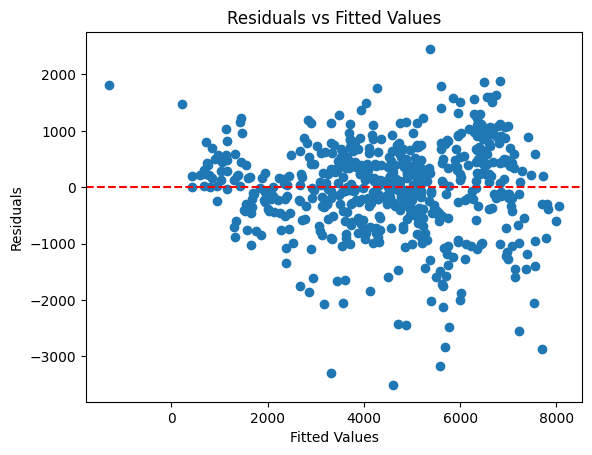

In [16]:
# Plot residuals vs fitted values

import matplotlib.pyplot as plt
plt.scatter(refined_model.fittedvalues, refined_model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


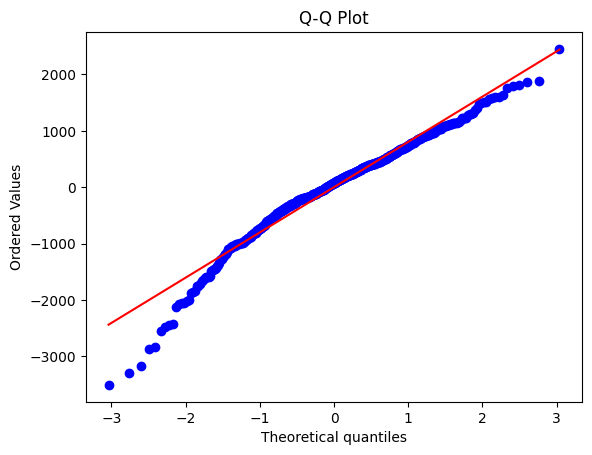

In [17]:
# Q-Q Plot
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(refined_model.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()
